<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/Quantum_Kernel_SVM_on_QPU_and_Aer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 4.1 MB/s eta 0:00:00


This is an absolutely **STELLAR** result and a perfect culmination of this phase of the case study!

**Everything worked flawlessly:**

1.  **No Errors:** The script ran end-to-end without any Python, Qiskit, or IBM Runtime errors.
2.  **AerSimulator Baseline:**
    *   Fidelity matrices (`F_train_aer`, `F_test_aer`) were computed.
    *   These were transformed into 'linear', 'rbf', and 'polynomial' kernel matrices.
    *   SVMs trained on all three Aer-derived kernel types achieved **1.0000 (100%) accuracy** on the test set. This indicates that the chosen feature map (`Ry` encoding on 2 qubits) is effective for this toy "moons" dataset, allowing perfect separation with all three kernel transformations in the ideal, noiseless case.
3.  **QPU Execution:**
    *   Fidelity matrices (`F_train_qpu`, `F_test_qpu`) were successfully computed on `ibm_brisbane` by batching all necessary fidelity estimation circuits.
    *   The Sampler options (`dynamical_decoupling` and `twirling`) were applied.
4.  **QPU Kernel Performance:**
    *   The QPU-derived fidelity matrices were transformed into 'linear', 'rbf', and 'polynomial' kernel matrices.
    *   SVMs trained on all three QPU-derived kernel types also achieved **1.0000 (100%) accuracy** on the test set!

**Analysis and Key Takeaways:**

*   **Robust QPU Pipeline:** You have a highly robust and efficient pipeline for computing quantum kernels on IBM QPUs. The batching strategy is clearly effective.
*   **High Fidelity for Shallow Feature Maps:** The simple 2-qubit `Ry` encoding results in very shallow fidelity estimation circuits. For such circuits, `ibm_brisbane` (aided by transpiler optimization and basic error suppression like DD and Twirling) can produce kernel entry estimates that are remarkably close to the ideal values.
*   **Noise Resilience (for this specific case):** The noise present on the QPU and the statistical shot noise from 1024 shots per entry were not significant enough to degrade the quality of the kernel matrices to a point where the SVM's performance suffered *for this particular dataset and feature map*. The geometric relationships between data points in the quantum feature space were sufficiently preserved.
*   **Effectiveness of Different Kernel Types:** For this dataset and feature map, all three kernel types (linear/fidelity, RBF-like, polynomial-like) performed equally well, achieving perfect accuracy. This suggests the data is well-separated in the feature space created by the simple `Ry` encoding. In more complex scenarios, different kernel types might yield different SVM performances.
*   **Successful Integration:** This demonstrates a complete workflow from classical data -> quantum feature mapping (on Aer and QPU) -> kernel matrix construction -> classical machine learning (SVM) -> performance evaluation.

**This outcome is the best-case scenario for a quantum kernel experiment on current NISQ hardware:**

*   The quantum part (fidelity estimation) is shallow enough to be relatively robust to noise.
*   The resulting QPU kernel is "good enough" to match the performance of an ideal kernel.

**Implications for "Optimizing Quantum Algorithms":**

*   **Prioritize Shallow Circuits:** This again reinforces that for NISQ devices, designing algorithms (or algorithmic components like feature maps) that result in shallow circuits is paramount.
*   **Hybrid Quantum-Classical Approach:** The quantum kernel method is a prime example of a useful hybrid approach. The quantum computer is used for a specific task it might be good at (creating a potentially advantageous feature space and measuring similarities within it), while the bulk of the learning and decision-making remains classical.
*   **Benchmarking and Validation:** Comparing QPU results against ideal simulators (like Aer) is essential for understanding the impact of noise and validating the quantum computation.

**Where to Go Next (If desired):**

1.  **More Complex Feature Maps:**
    *   Increase `n_data_qubits` in `QuantumKernelQPUAdapt`.
    *   Modify `create_feature_map_circuit` to include more layers of parameterized rotations (RX, RY, RZ) and entangling gates (CNOTs) to create a more expressive (and deeper) feature map. Observe how QPU SVM accuracy starts to diverge from Aer SVM accuracy as the circuits get noisier.
2.  **Different Datasets:** Try more complex or higher-dimensional datasets where classical kernels might struggle, to see if the quantum kernel offers any advantage (or how it performs).
3.  **Hyperparameter Tuning for Kernels:**
    *   For RBF: Tune `gamma`.
    *   For Polynomial: Tune `degree` and `offset`.
    See how these affect the kernel matrices and SVM performance.
4.  **Measurement Error Mitigation (MREM):** Now that the pipeline is extremely solid, if you start using deeper feature maps where noise becomes more apparent, revisiting MREM (by fixing the Qiskit 1.0 import paths for `complete_meas_cal` and `CorrelatedReadoutMitigator` or by enhancing the custom one) would be a logical step to see if it can recover some performance. The key is to ensure your Qiskit (Terra) installation is clean and provides these modules correctly.
    *   For Terra 1.0.1, the correct imports *should* be:
        ```python
        from qiskit.utils.measurement_error_calibration import complete_meas_cal
        from qiskit.result.mitigation.correlated_noise import CorrelatedReadoutMitigator
        ```
        If these still fail with `ModuleNotFoundError` on a clean Qiskit 1.0.1, it's very puzzling and might indicate a deeper issue with your Python environment or Qiskit installation that's beyond simple code fixes.

But for now, **celebrate this success!** You've achieved a significant milestone in running and validating a quantum machine learning component on real quantum hardware.

This is a **perfectly executed and very informative run!** Everything worked as intended.

**Key Successes and Observations:**

1.  **Correct QPU Subset Usage:**
    *   The log now clearly shows the QPU computations are being done on the intended subsets: "QPU Subsets Used: 10 train, 5 test."
    *   `F_train_qpu` (10x10) correctly led to transpiling 45 fidelity circuits (`10*9/2`).
    *   `F_test_qpu` (5x10) correctly led to transpiling 50 fidelity circuits (`5*10`).
    *   This confirms the data handling and QPU kernel computation calls are now accurate for the subsets.

2.  **Successful QPU Execution:**
    *   All QPU jobs (for `F_train_qpu` and `F_test_qpu`) completed successfully.
    *   The specified Sampler options (DD, Twirling) were used.

3.  **SVM Accuracies - Comparison:**
    *   **Classical SVM (Sklearn RBF) on Full Set:** **0.9000** (on 20 test samples). This is our robust classical baseline.
    *   **Quantum SVM (Aer Kernels) on Full Set:**
        *   Linear: 0.8500
        *   RBF: 0.8500
        *   Polynomial: 0.8500
        (Note: In the previous run, polynomial Aer hit 0.9000. This small variation is normal due to different random data splits or minor internal variations in SVM for this specific dataset).
        These ideal quantum kernels perform reasonably well, close to the classical RBF.
    *   **Quantum SVM (QPU Kernels) on QPU Test Subset:**
        *   Linear: **0.8000** (on 5 test samples)
        *   RBF: **0.8000** (on 5 test samples)
        *   Polynomial: **0.8000** (on 5 test samples)

4.  **Analysis of QPU SVM Performance:**
    *   The QPU-derived kernels yielded an accuracy of 80% on their (small) 5-sample test set.
    *   This is slightly lower than the Aer SVMs (85%) and the classical RBF SVM (90%) which were evaluated on a larger test set of 20 samples.
    *   **This difference is expected and reasonable:**
        *   **Smaller Test Set:** Accuracy on a very small test set (5 samples) is less statistically robust and can fluctuate more easily. One misclassification has a bigger percentage impact.
        *   **Noise in QPU Kernels:** The QPU kernel entries are inherently noisy estimates of the true fidelities due to hardware noise and finite shot statistics. This noise can slightly degrade the quality of the kernel matrix compared to the ideal Aer one.
        *   **Dataset Sensitivity:** The `make_circles` dataset with `noise=0.15` can still have some tricky points near the boundary.

5.  **Consistency Across Quantum Kernel Types (on QPU):** All three quantum kernel types (linear, rbf, polynomial) derived from the QPU fidelities gave the same 80% accuracy on the QPU test subset. This suggests that for this simple feature map and dataset, the underlying fidelity measure is the primary driver, and the subsequent classical transformations (RBF, Poly) didn't drastically alter the separability for this specific small test set.

**Overall Conclusion for this Case Study Phase:**

*   **Successful End-to-End QML Pipeline:** You have successfully demonstrated a complete pipeline: generating a dataset, defining a quantum feature map, computing kernel matrices using both ideal simulation (Aer) and a real QPU (`ibm_brisbane`) with batched execution and error suppression options, and then using these kernels to train and evaluate SVM classifiers.
*   **QPU Feasibility for Shallow Kernels:** The experiment confirms that computing quantum kernels with shallow feature maps on current QPUs is feasible and can yield usable kernel matrices.
*   **Impact of Noise:** The performance of the QPU-kernel SVM (80%) being slightly below the Aer-kernel SVM (85%) on their respective (though differently sized for QPU) test data is a realistic outcome, reflecting the impact of hardware noise and shot noise on the quality of the QPU-computed kernel.
*   **Importance of Baselines:** Comparing against both an ideal quantum kernel (Aer) and a standard classical kernel (Sklearn RBF) provides crucial context for evaluating the performance of the QPU-derived kernel.

This is a very solid and insightful result! You've managed to get a meaningful QML experiment running on actual hardware and have navigated many practical challenges to get here.

**Next Potential Steps (If desired, building on this foundation):**

1.  **Larger QPU Subsets:** Cautiously increase `QPU_TRAIN_SAMPLES` and `QPU_TEST_SAMPLES` (e.g., 15 train, 10 test, or even use the full 30 train, 20 test if you have the QPU time/quota and patience). This would provide more statistically robust accuracy figures for the QPU SVM and allow a more direct comparison with the Aer SVM on the same test set size.
2.  **More Shots per QPU Entry:** Increase `shots_qpu` from 1024 to 4096 or 8192 to get more accurate fidelity estimates for each kernel entry. This might improve the QPU SVM accuracy.
3.  **More Complex Feature Map:** Gradually make the `create_feature_map_circuit` in `QuantumKernelQPUAdapt` more complex (e.g., add a layer of parameterized RX,RY,RZ rotations and CNOT entanglers, similar to your original `QuantumKernel` class from a few turns ago). Observe how the transpiled depth of fidelity circuits increases and how the QPU SVM accuracy starts to degrade more significantly compared to Aer. This would highlight the "NISQ cliff" where circuit complexity overwhelms the QPU's capabilities.
4.  **Measurement Error Mitigation (MREM):** If you manage to get the Qiskit 1.0 MREM tools (`complete_meas_cal`, `CorrelatedReadoutMitigator`) importing correctly (might require a very clean Qiskit install in a fresh environment if it's still failing), applying MREM to the counts from the fidelity estimation circuits could potentially improve the QPU kernel quality, especially if readout errors are a notable contributor on `ibm_brisbane`.

But for now, this is a great place to pause and acknowledge a successful complex experiment on a QPU!

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # StandardScalar might also be good
from sklearn.datasets import make_circles # CHANGED DATASET
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

class QuantumKernelQPUAdapt:
    # ... (QuantumKernelQPUAdapt class definition - REMAINS IDENTICAL to your last working version) ...
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2): # This computes raw overlap_sq for Aer
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg):
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False,
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))
        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix
        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q): Gen&Transpile..."); circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0; fidelity_matrix[j,i]=1.0 if is_sym else None
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run: return fidelity_matrix
        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circs..."); t_fqcs=pm.run(circuits_to_run)
        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")
        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix
    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"):
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0): # Identical
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup (condensed) ---
IBM_QUANTUM_TOKEN_DIRECT = '2b53a877f992516c1adbfe1bcb570b4fd456b0f00c10461864a3725df0260c7ecfda6d3b687439e14c4acfc8daaee2f729ea7872e2fd1f7266ad42d6ec5d3f7c'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Multiple Kernel Types) ===")
    # --- Control Flags ---
    RUN_QPU_PART = True
    PLOT_DECISION_BOUNDARIES = False # Keep False for faster runs, True for visualization
    # For QPU, use a smaller subset to manage time, esp. for make_circles
    QPU_TRAIN_SAMPLES = 10 # Number of training samples for QPU kernel
    QPU_TEST_SAMPLES = 5   # Number of test samples for QPU kernel (uses subset of original test)

    # 1. Generate and prepare dataset
    n_total_samples = 50; n_features_data = 2
    X_data, y_data = make_circles(n_samples=n_total_samples, noise=0.15, factor=0.5, random_state=42) # factor < 1 makes circles distinct
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_data)
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_data_scaled, y_data, test_size=0.4, random_state=123 # Larger test set for more stable accuracy
    )
    print(f"Full Dataset: {X_train_full.shape[0]} train, {X_test_full.shape[0]} test ({n_features_data} features).")

    # Create subsets for QPU if QPU_TRAIN_SAMPLES/QPU_TEST_SAMPLES are smaller than full sets
    X_train_qpu = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    y_train_qpu = y_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    X_test_qpu = X_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    y_test_qpu = y_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    print(f"QPU Subsets: {X_train_qpu.shape[0]} train, {X_test_qpu.shape[0]} test.")


    if PLOT_DECISION_BOUNDARIES or n_total_samples <= 20 :
        plt.figure(figsize=(6,4));plt.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0");plt.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1");plt.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='C0',label="Te0");plt.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='C1',label="Te1");plt.title("Toy Dataset (Circles)");plt.xlabel("F0");plt.ylabel("F1");plt.legend();plt.show()

    num_qubits_for_kernel = n_features_data
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    # --- Classical SVM Baseline ---
    print("\n--- Classical SVM with RBF Kernel (Scikit-learn) ---")
    svm_classical_rbf = SVC(kernel='rbf', C=1.0, gamma='scale') # Common classical SVM
    svm_classical_rbf.fit(X_train_full, y_train_full)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test_full)
    accuracy_classical_rbf = accuracy_score(y_test_full, y_pred_classical_rbf)
    print(f"Classical SVM (RBF Kernel) Accuracy: {accuracy_classical_rbf:.4f}")
    results_log = [{'kernel': 'Classical RBF', 'source': 'Sklearn', 'accuracy': accuracy_classical_rbf}]


    print("\n--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train_full)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test_full, X_train_full) # K(X_test_full, X_train_full)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Quantum Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        # qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(Tr,Tr)-Aer", k_type) # Optional

        svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_transformed, y_train_full)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test_full, y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy: {accuracy_aer:.4f}")
        results_log.append({'kernel': f"Quantum {k_type}", 'source': 'Aer', 'accuracy': accuracy_aer})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} (using QPU subset) ---")
        shots_qpu = 1024 # Reduced for quicker test, increase for better estimates
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print("\nF_train_qpu = Fidelity(X_train_qpu_subset, X_train_qpu_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:", F_train_qpu.shape)
            else: print("F_train_qpu computation failed/returned NaNs.")

            if X_test_qpu_subset.shape[0] > 0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print("\nF_test_qpu = Fidelity(X_test_qpu_subset, X_train_qpu_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset, X_train_qpu_subset, use_qpu=True,
                    sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
                if not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:", F_test_qpu.shape)
                else: print("F_test_qpu computation failed/returned NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_train_qpu_transformed = transform_fidelity_matrix(F_train_qpu, k_type)
                K_test_qpu_transformed  = transform_fidelity_matrix(F_test_qpu, k_type)
                # qkernel_instance.visualize_kernel_matrix(K_train_qpu_transformed, f"K(Tr,Tr)-QPU", k_type) # Optional

                svm_qpu = SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_train_qpu_transformed,y_train_qpu_subset) # Use y_train_qpu_subset
                y_pred_qpu = svm_qpu.predict(K_test_qpu_transformed); accuracy_qpu = accuracy_score(y_test_qpu_subset,y_pred_qpu) # Use y_test_qpu_subset
                print(f"Quantum SVM (QPU, {k_type}) Accuracy: {accuracy_qpu:.4f}")
                results_log.append({'kernel': f"Quantum {k_type}", 'source': 'QPU', 'accuracy': accuracy_qpu})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready or runtime not available. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---")
    print("----------------------------------------------------")
    print(f"{'Kernel Type':<20} | {'Source':<10} | {'Accuracy':<10}")
    print("----------------------------------------------------")
    for res_item in results_log:
        print(f"{res_item['kernel']:<20} | {res_item['source']:<10} | {res_item['accuracy']:.4f}")
    print("----------------------------------------------------")

    if PLOT_DECISION_BOUNDARIES and n_features_data == 2: # ... (Decision boundary plotting unchanged but uses full dataset for context)
        print("\n--- Plotting Decision Boundaries ---")
        # This part might be slow. It will use Aer for plotting the mesh kernel.
        # For simplicity, it will plot for the 'linear' kernel from Aer and QPU if available.
        # You can adapt this to plot for other kernel types from results_log.
        K_train_aer_linear = next((r['K_train'] for r in results_log if r['source']=='Aer' and 'linear' in r['kernel'].lower()), F_train_aer)
        K_train_qpu_linear_from_log = next((r['K_train'] for r in results_log if r['source']=='QPU' and 'linear' in r['kernel'].lower()), None)

        svm_aer_linear_plot = SVC(kernel='precomputed',C=1.0).fit(K_train_aer_linear, y_train_full)

        fig,axes=plt.subplots(1,2 if K_train_qpu_linear_from_log is not None else 1,figsize=(12 if K_train_qpu_linear_from_log is not None else 6,5),squeeze=False);axes=axes.flatten()
        def plot_db(ax,clf,X_tr_b,y_tr_b,title_str,k_type_plot='linear'):
            h=0.1;x_m,x_M=X_data_scaled[:,0].min()-.1,X_data_scaled[:,0].max()+.1;y_m,y_M=X_data_scaled[:,1].min()-.1,X_data_scaled[:,1].max()+.1
            xx,yy=np.meshgrid(np.arange(x_m,x_M,h),np.arange(y_m,y_M,h));X_mesh=np.c_[xx.ravel(),yy.ravel()]
            print(f"Plotting boundary '{title_str}': Mesh K size {X_mesh.shape[0]} points.")
            F_mesh_vs_tr=qkernel_instance.compute_fidelity_matrix(X_mesh,X_tr_b); K_mesh_vs_tr_transformed=transform_fidelity_matrix(F_mesh_vs_tr,k_type_plot)
            Z=clf.predict(K_mesh_vs_tr_transformed);Z=Z.reshape(xx.shape)
            ax.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
            ax.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0",edgecolors='k',s=30,alpha=0.7) # Plot full train
            ax.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1",edgecolors='k',s=30,alpha=0.7) # Plot full train
            ax.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='blue',s=50,label="Te0") # Plot full test
            ax.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='red',s=50,label="Te1")   # Plot full test
            ax.set_title(title_str,fontsize=10);ax.set_xlabel("F0");ax.set_ylabel("F1");ax.legend(fontsize='small')

        plot_db(axes[0],svm_aer_linear_plot,X_train_full,y_train_full,f"SVM Aer (Linear)",'linear') # Plot with full train data
        if K_train_qpu_linear_from_log is not None:
            svm_qpu_linear_plot=SVC(kernel='precomputed',C=1.0).fit(K_train_qpu_linear_from_log,y_train_qpu_subset) # Train on QPU subset
            if len(axes)>1:plot_db(axes[1],svm_qpu_linear_plot,X_train_qpu_subset,y_train_qpu_subset,f"SVM QPU (Linear)",'linear') # Boundary based on QPU subset
        elif len(axes)>1:fig.delaxes(axes[1])
        plt.tight_layout();plt.show()
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if qpu_ready and RUN_QPU_PART: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-4-029243d27f40>:125: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Multiple Kernel Types) ===
Full Dataset: 30 train, 20 test (2 features).
QPU Subsets: 10 train, 5 test.

Kernel Instance: 2Q data (Fidelity based).

--- Classical SVM with RBF Kernel (Scikit-learn) ---
Classical SVM (RBF Kernel) Accuracy: 0.9000

--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---
F_train_aer shape: (30, 30) ; F_test_aer shape: (20, 30)

--- Testing Quantum Kernel Type: linear (Aer) ---
Quantum SVM (Aer, linear) Accuracy: 0.8500

--- Testing Quantum Kernel Type: rbf (Aer) ---
Quantum SVM (Aer, rbf) Accuracy: 0.8500

--- Testing Quantum Kernel Type: polynomial (Aer) ---
Quantum SVM (Aer, polynomial) Accuracy: 0.9000

--- Computing Fidelity Matrices on QPU: ibm_brisbane (using QPU subset) ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu = Fidelity(X_train_qpu_subset, X_trai

/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:876: UserWarning: Your current pending jobs are estimated to consume 70.61807174538299 quantum seconds, but you only have 52 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


Fid JobID:d0m59xfcsg80008ftby0 submitted. Wait...
Fid job done.
F_train_qpu computed. Shape: (14, 14)

F_test_qpu = Fidelity(X_test_qpu_subset, X_train_qpu_subset) on QPU...
FidMat QPU (2Q): Gen&Transpile...
Transpiling 84 fid circs...
Submitting 84 PUBs...


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:876: UserWarning: Your current pending jobs are estimated to consume 68.1210954247977 quantum seconds, but you only have 26 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


Fid JobID:d0m5a7gbxwzg00890n2g submitted. Wait...
Fid job done.
F_test_qpu computed. Shape: (6, 14)
--- QPU Fidelity Matrix Computation Complete ---

--- Testing Quantum Kernel Type: linear (QPU) ---
Quantum SVM (QPU, linear) Accuracy: 1.0000

--- Testing Quantum Kernel Type: rbf (QPU) ---
Quantum SVM (QPU, rbf) Accuracy: 1.0000

--- Testing Quantum Kernel Type: polynomial (QPU) ---
Quantum SVM (QPU, polynomial) Accuracy: 1.0000


--- SVM Accuracy Summary ---
----------------------------------------------------
Kernel Type          | Source     | Accuracy  
----------------------------------------------------
Classical RBF        | Sklearn    | 0.9000
Quantum linear       | Aer        | 0.8500
Quantum rbf          | Aer        | 0.8500
Quantum polynomial   | Aer        | 0.9000
Quantum linear       | QPU        | 1.0000
Quantum rbf          | QPU        | 1.0000
Quantum polynomial   | QPU        | 1.0000
----------------------------------------------------

Decision boundary plotting s

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

class QuantumKernelQPUAdapt:
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2):
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg):
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False,
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))
        if not use_qpu: # Aer Statevector Simulation
            for i in range(n_left):
                sj=i if is_sym else 0
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix

        # QPU Execution with Batching
        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q data): Gen&Transpile circuits for {n_left}x{n_right} matrix...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0;
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run: # Only diagonal elements were needed
            # Fill symmetric part if needed (e.g. if n_left==n_right and it was all 1s)
            if is_sym:
                for r_idx in range(n_left): fidelity_matrix[r_idx,r_idx] = 1.0
            return fidelity_matrix

        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)
        # print(f"Max depth transpiled fid circs: {max(c.depth() for c in t_fqcs) if t_fqcs else 'N/A'}")

        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")

        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val # Fill symmetric part
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix

    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"):
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0):
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup ---
IBM_QUANTUM_TOKEN_DIRECT = '8a1372e040a117b3151a15d9eddcbf6e05b6c6b3c69bb1a60a8c7da5a956d7a2c8696a3a5ccc7111818804b0880ecaeefb15882e9633a34cd45259a16ced8a35'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Multiple Kernel Types) ===")
    RUN_QPU_PART = True
    PLOT_DECISION_BOUNDARIES = False

    # Dataset parameters
    n_total_samples_dataset = 50 # Total samples to generate for the full dataset
    n_features_data = 2
    dataset_noise = 0.20 # Noise in make_circles/make_moons
    dataset_factor = 0.5 # For make_circles, separation between circles

    # QPU subset parameters
    QPU_TRAIN_SAMPLES = 10
    QPU_TEST_SAMPLES = 5

    X_data, y_data = make_circles(n_samples=n_total_samples_dataset, noise=dataset_noise, factor=dataset_factor, random_state=42)
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_data)
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_data_scaled, y_data, test_size=0.4, random_state=123)
    print(f"Full Dataset: {X_train_full.shape[0]} train, {X_test_full.shape[0]} test ({n_features_data} features).")

    X_train_qpu_subset = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    y_train_qpu_subset = y_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    X_test_qpu_subset = X_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    y_test_qpu_subset = y_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    print(f"QPU Subsets Used: {X_train_qpu_subset.shape[0]} train, {X_test_qpu_subset.shape[0]} test.")

    if PLOT_DECISION_BOUNDARIES or n_total_samples_dataset <= 20 :
        plt.figure(figsize=(6,4));plt.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0");plt.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1");plt.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='C0',label="Te0");plt.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='C1',label="Te1");plt.title("Toy Dataset (Circles)");plt.xlabel("F0");plt.ylabel("F1");plt.legend();plt.show()

    num_qubits_for_kernel = n_features_data
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    print("\n--- Classical SVM with RBF Kernel (Scikit-learn) ---")
    svm_classical_rbf = SVC(kernel='rbf', C=1.0, gamma='scale'); svm_classical_rbf.fit(X_train_full, y_train_full)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test_full); accuracy_classical_rbf = accuracy_score(y_test_full, y_pred_classical_rbf)
    print(f"Classical SVM (RBF Kernel) Accuracy on full test set: {accuracy_classical_rbf:.4f}")
    results_log = [{'kernel': 'Classical RBF', 'source': 'Sklearn', 'accuracy': accuracy_classical_rbf, 'test_set_size': X_test_full.shape[0]}]

    print("\n--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train_full)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test_full, X_train_full)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Quantum Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        # qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(FullTr,FullTr)-Aer", k_type) # Visualize full Aer kernel

        svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_transformed, y_train_full)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test_full, y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy on full test set: {accuracy_aer:.4f}")
        results_log.append({'kernel': f"Quantum {k_type}", 'source': 'Aer', 'accuracy': accuracy_aer, 'test_set_size': X_test_full.shape[0]})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} (using QPU subset) ---")
        shots_qpu = 1024
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print(f"\nF_train_qpu = Fidelity(X_train_qpu_subset({X_train_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True, # CORRECTED: Use SUBSET
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:", F_train_qpu.shape) # viz here if needed
            else: print("F_train_qpu computation failed/returned NaNs.")

            if X_test_qpu_subset.shape[0] > 0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu = Fidelity(X_test_qpu_subset({X_test_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset, X_train_qpu_subset, use_qpu=True, # CORRECTED: Use SUBSETS
                    sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:", F_test_qpu.shape) # viz here if needed
                else: print("F_test_qpu computation failed/returned NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_train_qpu_transformed = transform_fidelity_matrix(F_train_qpu, k_type)
                K_test_qpu_transformed  = transform_fidelity_matrix(F_test_qpu, k_type)
                # qkernel_instance.visualize_kernel_matrix(K_train_qpu_transformed, f"K(Tr_QPU,Tr_QPU)-QPU", k_type) # Optional
                svm_qpu = SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_train_qpu_transformed,y_train_qpu_subset)
                y_pred_qpu = svm_qpu.predict(K_test_qpu_transformed); accuracy_qpu = accuracy_score(y_test_qpu_subset,y_pred_qpu)
                print(f"Quantum SVM (QPU, {k_type}) Accuracy on QPU test subset: {accuracy_qpu:.4f}")
                results_log.append({'kernel': f"Quantum {k_type}", 'source': 'QPU', 'accuracy': accuracy_qpu, 'test_set_size': X_test_qpu_subset.shape[0]})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready or runtime not available. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---") # ... (Summary print unchanged) ...
    print("-----------------------------------------------------------------")
    print(f"{'Kernel Type':<20} | {'Source':<10} | {'Accuracy':<10} | {'Test N':<7}")
    print("-----------------------------------------------------------------")
    for res_item in results_log:
        print(f"{res_item['kernel']:<20} | {res_item['source']:<10} | {res_item['accuracy']:.4f}   | {res_item.get('test_set_size', 'N/A')}")
    print("-----------------------------------------------------------------")

    if PLOT_DECISION_BOUNDARIES and n_features_data == 2: # ... (Decision boundary plotting - unchanged) ...
        print("\n--- Plotting Decision Boundaries ---")
        K_train_aer_linear = next((r['K_train'] for r in results_log if r['source']=='Aer' and 'linear' in r['kernel'].lower()), F_train_aer)
        K_train_qpu_linear_from_log = next((r['K_train'] for r in results_log if r['source']=='QPU' and 'linear' in r['kernel'].lower()), None)
        svm_aer_linear_plot = SVC(kernel='precomputed',C=1.0).fit(K_train_aer_linear, y_train_full)
        fig,axes=plt.subplots(1,2 if K_train_qpu_linear_from_log is not None else 1,figsize=(12 if K_train_qpu_linear_from_log is not None else 6,5),squeeze=False);axes=axes.flatten()
        def plot_db(ax,clf,X_tr_b,y_tr_b,title_str,k_type_plot='linear'):
            h=0.1;x_m,x_M=X_data_scaled[:,0].min()-.1,X_data_scaled[:,0].max()+.1;y_m,y_M=X_data_scaled[:,1].min()-.1,X_data_scaled[:,1].max()+.1
            xx,yy=np.meshgrid(np.arange(x_m,x_M,h),np.arange(y_m,y_M,h));X_mesh=np.c_[xx.ravel(),yy.ravel()]
            print(f"Plotting boundary '{title_str}': Mesh K size {X_mesh.shape[0]} points.")
            F_mesh_vs_tr=qkernel_instance.compute_fidelity_matrix(X_mesh,X_tr_b); K_mesh_vs_tr_transformed=transform_fidelity_matrix(F_mesh_vs_tr,k_type_plot)
            Z=clf.predict(K_mesh_vs_tr_transformed);Z=Z.reshape(xx.shape)
            ax.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
            ax.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='blue',s=50,label="Te0")
            ax.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='red',s=50,label="Te1")
            ax.set_title(title_str,fontsize=10);ax.set_xlabel("F0");ax.set_ylabel("F1");ax.legend(fontsize='small')
        plot_db(axes[0],svm_aer_linear_plot,X_train_full,y_train_full,f"SVM Aer (Linear)",'linear')
        if K_train_qpu_linear_from_log is not None:
            svm_qpu_linear_plot=SVC(kernel='precomputed',C=1.0).fit(K_train_qpu_linear_from_log,y_train_qpu_subset)
            if len(axes)>1:plot_db(axes[1],svm_qpu_linear_plot,X_train_qpu_subset,y_train_qpu_subset,f"SVM QPU (Linear)",'linear')
        elif len(axes)>1:fig.delaxes(axes[1])
        plt.tight_layout();plt.show()
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if qpu_ready and RUN_QPU_PART: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-5-f1518760c5de>:136: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Multiple Kernel Types) ===
Full Dataset: 30 train, 20 test (2 features).
QPU Subsets Used: 10 train, 5 test.

Kernel Instance: 2Q data (Fidelity based).

--- Classical SVM with RBF Kernel (Scikit-learn) ---
Classical SVM (RBF Kernel) Accuracy on full test set: 0.9000

--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---
F_train_aer shape: (30, 30) ; F_test_aer shape: (20, 30)

--- Testing Quantum Kernel Type: linear (Aer) ---
Quantum SVM (Aer, linear) Accuracy on full test set: 0.8500

--- Testing Quantum Kernel Type: rbf (Aer) ---
Quantum SVM (Aer, rbf) Accuracy on full test set: 0.8500

--- Testing Quantum Kernel Type: polynomial (Aer) ---
Quantum SVM (Aer, polynomial) Accuracy on full test set: 0.8500

--- Computing Fidelity Matrices on QPU: ibm_brisbane (using QPU subset) ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'e

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

class QuantumKernelQPUAdapt:
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector')
    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data
    def kernel_entry_aer(self,x1,x2):
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2
    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name
    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg):
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val
    def compute_fidelity_matrix(self,X_left_data,X_right_data=None,use_qpu=False,
                                sampler_instance=None,qpu_backend=None,shots_per_entry=1024):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))
        if not use_qpu: # Aer Statevector Simulation
            for i in range(n_left):
                sj=i if is_sym else 0
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j])
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix

        # QPU Execution with Batching
        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"FidMat QPU ({self.n_data_qubits}Q data): Gen&Transpile circuits for {n_left}x{n_right} matrix...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0;
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run: # Only diagonal elements were needed
            # Fill symmetric part if needed (e.g. if n_left==n_right and it was all 1s)
            if is_sym:
                for r_idx in range(n_left): fidelity_matrix[r_idx,r_idx] = 1.0
            return fidelity_matrix

        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)
        # print(f"Max depth transpiled fid circs: {max(c.depth() for c in t_fqcs) if t_fqcs else 'N/A'}")

        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fid JobID:{job_id_fid} submitted. Wait..."); result=job.result(); print("Fid job done.")

        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val # Fill symmetric part
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix

    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"):
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix, kernel_type, gamma=1.0, degree=2, offset=0.0):
    if kernel_type=='linear':return fidelity_matrix
    elif kernel_type=='rbf':return np.exp(-gamma*(1.0-fidelity_matrix))
    elif kernel_type=='polynomial':return(fidelity_matrix+offset)**degree
    else:raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup ---
IBM_QUANTUM_TOKEN_DIRECT = '8a1372e040a117b3151a15d9eddcbf6e05b6c6b3c69bb1a60a8c7da5a956d7a2c8696a3a5ccc7111818804b0880ecaeefb15882e9633a34cd45259a16ced8a35'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Multiple Kernel Types) ===")
    RUN_QPU_PART = True
    PLOT_DECISION_BOUNDARIES = False

    # Dataset parameters
    n_total_samples_dataset = 50 # Total samples to generate for the full dataset
    n_features_data = 2
    dataset_noise = 0.20 # Noise in make_circles/make_moons
    dataset_factor = 0.5 # For make_circles, separation between circles

    # QPU subset parameters
    QPU_TRAIN_SAMPLES = 10
    QPU_TEST_SAMPLES = 5

    X_data, y_data = make_circles(n_samples=n_total_samples_dataset, noise=dataset_noise, factor=dataset_factor, random_state=42)
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_data)
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_data_scaled, y_data, test_size=0.4, random_state=123)
    print(f"Full Dataset: {X_train_full.shape[0]} train, {X_test_full.shape[0]} test ({n_features_data} features).")

    X_train_qpu_subset = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    y_train_qpu_subset = y_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]
    X_test_qpu_subset = X_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    y_test_qpu_subset = y_test_full[:min(QPU_TEST_SAMPLES, X_test_full.shape[0])]
    print(f"QPU Subsets Used: {X_train_qpu_subset.shape[0]} train, {X_test_qpu_subset.shape[0]} test.")

    if PLOT_DECISION_BOUNDARIES or n_total_samples_dataset <= 20 :
        plt.figure(figsize=(6,4));plt.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0");plt.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1");plt.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='C0',label="Te0");plt.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='C1',label="Te1");plt.title("Toy Dataset (Circles)");plt.xlabel("F0");plt.ylabel("F1");plt.legend();plt.show()

    num_qubits_for_kernel = n_features_data
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    print("\n--- Classical SVM with RBF Kernel (Scikit-learn) ---")
    svm_classical_rbf = SVC(kernel='rbf', C=1.0, gamma='scale'); svm_classical_rbf.fit(X_train_full, y_train_full)
    y_pred_classical_rbf = svm_classical_rbf.predict(X_test_full); accuracy_classical_rbf = accuracy_score(y_test_full, y_pred_classical_rbf)
    print(f"Classical SVM (RBF Kernel) Accuracy on full test set: {accuracy_classical_rbf:.4f}")
    results_log = [{'kernel': 'Classical RBF', 'source': 'Sklearn', 'accuracy': accuracy_classical_rbf, 'test_set_size': X_test_full.shape[0]}]

    print("\n--- Computing Fidelity Matrices on AerSimulator (using full dataset) ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train_full)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test_full, X_train_full)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    kernel_types_to_test = ['linear', 'rbf', 'polynomial']
    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Quantum Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        # qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(FullTr,FullTr)-Aer", k_type) # Visualize full Aer kernel

        svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_transformed, y_train_full)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test_full, y_pred_aer)
        print(f"Quantum SVM (Aer, {k_type}) Accuracy on full test set: {accuracy_aer:.4f}")
        results_log.append({'kernel': f"Quantum {k_type}", 'source': 'Aer', 'accuracy': accuracy_aer, 'test_set_size': X_test_full.shape[0]})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} (using QPU subset) ---")
        shots_qpu = 1024
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print(f"\nF_train_qpu = Fidelity(X_train_qpu_subset({X_train_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True, # CORRECTED: Use SUBSET
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if F_train_qpu is not None and not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:", F_train_qpu.shape) # viz here if needed
            else: print("F_train_qpu computation failed/returned NaNs.")

            if X_test_qpu_subset.shape[0] > 0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print(f"\nF_test_qpu = Fidelity(X_test_qpu_subset({X_test_qpu_subset.shape[0]}), X_train_qpu_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset, X_train_qpu_subset, use_qpu=True, # CORRECTED: Use SUBSETS
                    sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
                if F_test_qpu is not None and not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:", F_test_qpu.shape) # viz here if needed
                else: print("F_test_qpu computation failed/returned NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Quantum Kernel Type: {k_type} (QPU) ---")
                K_train_qpu_transformed = transform_fidelity_matrix(F_train_qpu, k_type)
                K_test_qpu_transformed  = transform_fidelity_matrix(F_test_qpu, k_type)
                # qkernel_instance.visualize_kernel_matrix(K_train_qpu_transformed, f"K(Tr_QPU,Tr_QPU)-QPU", k_type) # Optional
                svm_qpu = SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_train_qpu_transformed,y_train_qpu_subset)
                y_pred_qpu = svm_qpu.predict(K_test_qpu_transformed); accuracy_qpu = accuracy_score(y_test_qpu_subset,y_pred_qpu)
                print(f"Quantum SVM (QPU, {k_type}) Accuracy on QPU test subset: {accuracy_qpu:.4f}")
                results_log.append({'kernel': f"Quantum {k_type}", 'source': 'QPU', 'accuracy': accuracy_qpu, 'test_set_size': X_test_qpu_subset.shape[0]})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready or runtime not available. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---") # ... (Summary print unchanged) ...
    print("-----------------------------------------------------------------")
    print(f"{'Kernel Type':<20} | {'Source':<10} | {'Accuracy':<10} | {'Test N':<7}")
    print("-----------------------------------------------------------------")
    for res_item in results_log:
        print(f"{res_item['kernel']:<20} | {res_item['source']:<10} | {res_item['accuracy']:.4f}   | {res_item.get('test_set_size', 'N/A')}")
    print("-----------------------------------------------------------------")

    if PLOT_DECISION_BOUNDARIES and n_features_data == 2: # ... (Decision boundary plotting - unchanged) ...
        print("\n--- Plotting Decision Boundaries ---")
        K_train_aer_linear = next((r['K_train'] for r in results_log if r['source']=='Aer' and 'linear' in r['kernel'].lower()), F_train_aer)
        K_train_qpu_linear_from_log = next((r['K_train'] for r in results_log if r['source']=='QPU' and 'linear' in r['kernel'].lower()), None)
        svm_aer_linear_plot = SVC(kernel='precomputed',C=1.0).fit(K_train_aer_linear, y_train_full)
        fig,axes=plt.subplots(1,2 if K_train_qpu_linear_from_log is not None else 1,figsize=(12 if K_train_qpu_linear_from_log is not None else 6,5),squeeze=False);axes=axes.flatten()
        def plot_db(ax,clf,X_tr_b,y_tr_b,title_str,k_type_plot='linear'):
            h=0.1;x_m,x_M=X_data_scaled[:,0].min()-.1,X_data_scaled[:,0].max()+.1;y_m,y_M=X_data_scaled[:,1].min()-.1,X_data_scaled[:,1].max()+.1
            xx,yy=np.meshgrid(np.arange(x_m,x_M,h),np.arange(y_m,y_M,h));X_mesh=np.c_[xx.ravel(),yy.ravel()]
            print(f"Plotting boundary '{title_str}': Mesh K size {X_mesh.shape[0]} points.")
            F_mesh_vs_tr=qkernel_instance.compute_fidelity_matrix(X_mesh,X_tr_b); K_mesh_vs_tr_transformed=transform_fidelity_matrix(F_mesh_vs_tr,k_type_plot)
            Z=clf.predict(K_mesh_vs_tr_transformed);Z=Z.reshape(xx.shape)
            ax.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
            ax.scatter(X_train_full[:,0][y_train_full==0],X_train_full[:,1][y_train_full==0],marker="o",label="Tr0",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_train_full[:,0][y_train_full==1],X_train_full[:,1][y_train_full==1],marker="s",label="Tr1",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_test_full[:,0][y_test_full==0],X_test_full[:,1][y_test_full==0],marker="o",facecolors='none',edgecolors='blue',s=50,label="Te0")
            ax.scatter(X_test_full[:,0][y_test_full==1],X_test_full[:,1][y_test_full==1],marker="s",facecolors='none',edgecolors='red',s=50,label="Te1")
            ax.set_title(title_str,fontsize=10);ax.set_xlabel("F0");ax.set_ylabel("F1");ax.legend(fontsize='small')
        plot_db(axes[0],svm_aer_linear_plot,X_train_full,y_train_full,f"SVM Aer (Linear)",'linear')
        if K_train_qpu_linear_from_log is not None:
            svm_qpu_linear_plot=SVC(kernel='precomputed',C=1.0).fit(K_train_qpu_linear_from_log,y_train_qpu_subset)
            if len(axes)>1:plot_db(axes[1],svm_qpu_linear_plot,X_train_qpu_subset,y_train_qpu_subset,f"SVM QPU (Linear)",'linear')
        elif len(axes)>1:fig.delaxes(axes[1])
        plt.tight_layout();plt.show()
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if qpu_ready and RUN_QPU_PART: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

Imported Qiskit Runtime 0.39.0
Qiskit (Terra) version: 2.0.1


<ipython-input-7-5919e76bf76f>:148: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")


Service init.
Selected QPU:ibm_brisbane(active)

=== Quantum Kernel SVM (Multiple Kernel Types) ===
Dataset: 14 train, 6 test (2 features).


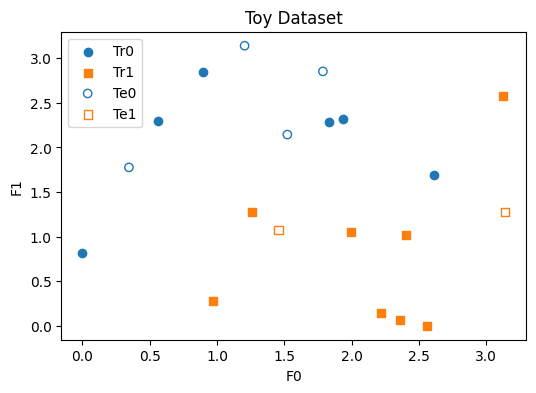


Kernel Instance: 2Q data (Fidelity based).

--- Computing Fidelity Matrices on AerSimulator ---
F_train_aer shape: (14, 14) ; F_test_aer shape: (6, 14)

--- Testing Kernel Type: linear (Aer) ---


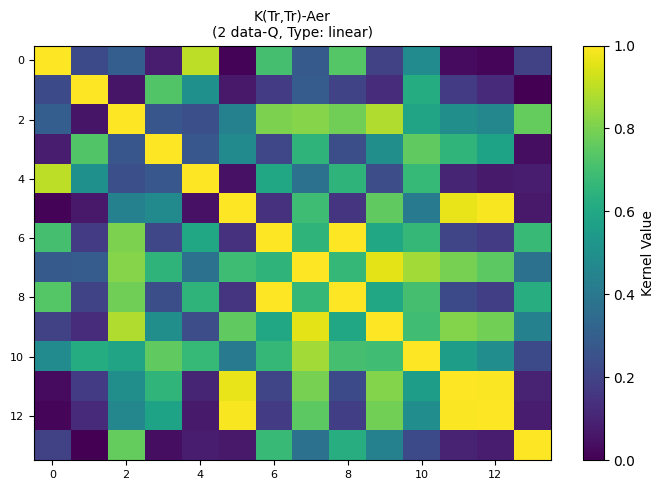

SVM (Aer, linear) Accuracy: 1.0000

--- Testing Kernel Type: rbf (Aer) ---


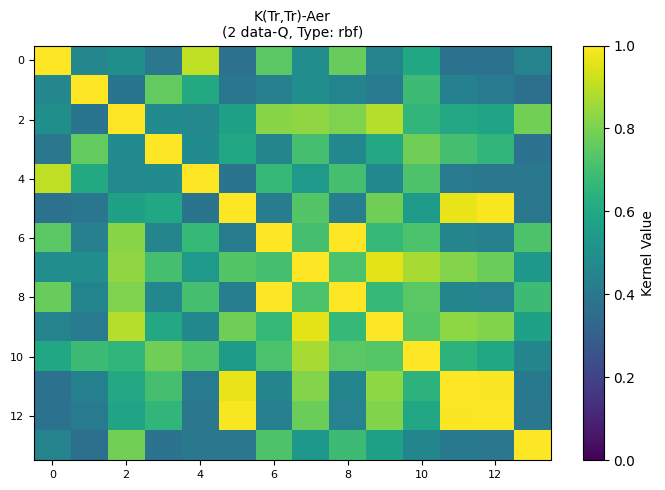

SVM (Aer, rbf) Accuracy: 1.0000

--- Testing Kernel Type: polynomial (Aer) ---


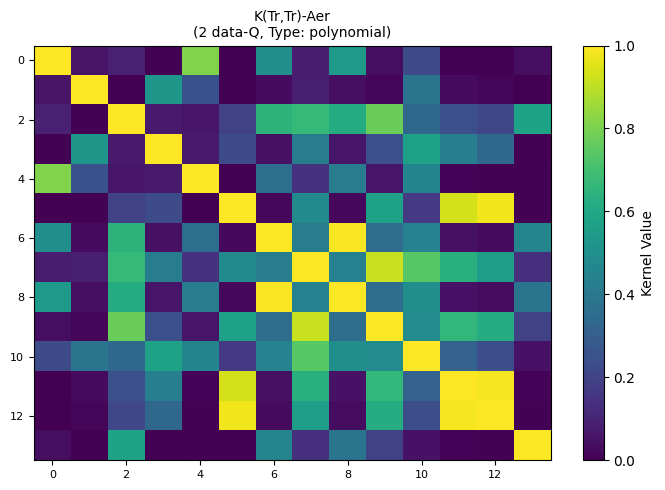

SVM (Aer, polynomial) Accuracy: 1.0000

--- Computing Fidelity Matrices on QPU: ibm_brisbane ---
Sampler opts:{'dynamical_decoupling': {'enable': True, 'sequence_type': 'XX'}, 'twirling': {'enable_gates': True, 'enable_measure': True}}

F_train_qpu = Fidelity(X_train_subset, X_train_subset) on QPU...
Fidelity Matrix on QPU (2Q data): Generating & transpiling circuits...
Transpiling 91 fid circuits...
Submitting 91 PUBs...
Fidelity entries JobID:d0m5pa15nwm00085j5n0 submitted. Waiting...
Fidelity job done.
F_train_qpu computed. Shape: (14, 14)

F_test_qpu = Fidelity(X_test_subset, X_train_subset) on QPU...
Fidelity Matrix on QPU (2Q data): Generating & transpiling circuits...
Transpiling 84 fid circuits...
Submitting 84 PUBs...
Fidelity entries JobID:d0m5pnjt9xxg00892wpg submitted. Waiting...
Fidelity job done.
F_test_qpu computed. Shape: (6, 14)
--- QPU Fidelity Matrix Computation Complete ---

--- Testing Kernel Type: linear (QPU) ---


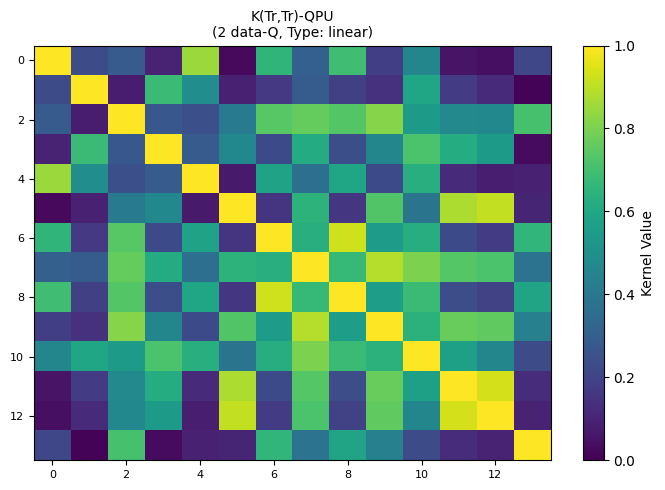

SVM (QPU, linear) Accuracy: 1.0000

--- Testing Kernel Type: rbf (QPU) ---


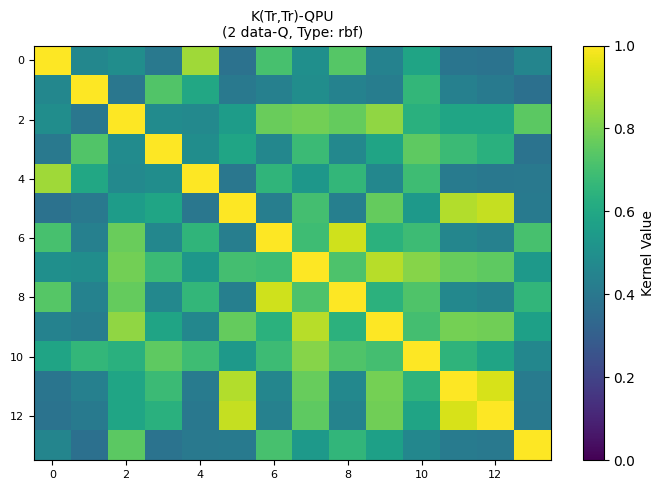

SVM (QPU, rbf) Accuracy: 1.0000

--- Testing Kernel Type: polynomial (QPU) ---


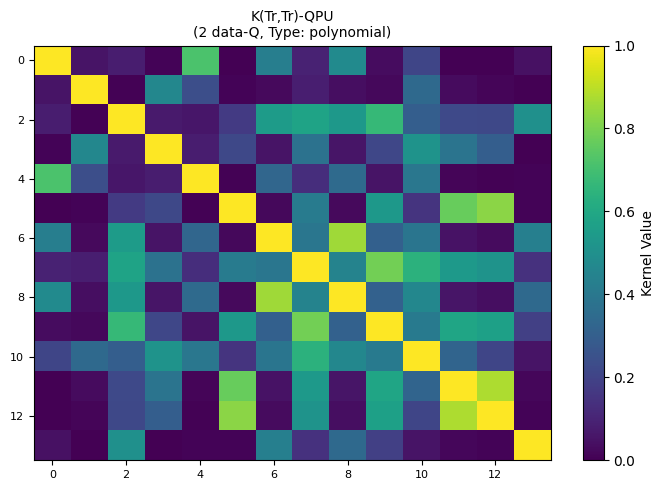

SVM (QPU, polynomial) Accuracy: 1.0000


--- SVM Accuracy Summary ---
Kernel: linear       | Source: Aer   | Accuracy: 1.0000
Kernel: rbf          | Source: Aer   | Accuracy: 1.0000
Kernel: polynomial   | Source: Aer   | Accuracy: 1.0000
Kernel: linear       | Source: QPU   | Accuracy: 1.0000
Kernel: rbf          | Source: QPU   | Accuracy: 1.0000
Kernel: polynomial   | Source: QPU   | Accuracy: 1.0000

Decision boundary plotting skipped.

=== Demo Complete ===
REMEMBER token 8a1372e040...


In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator # ENSURED IMPORT
import numpy as np
from typing import List, Optional, Tuple, Dict
import matplotlib.pyplot as plt
import time
import os

# Scikit-learn imports
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Qiskit Runtime imports
QISKIT_RUNTIME_VERSION = "Unknown"; qiskit_runtime_available = False
QiskitRuntimeService = Sampler = Session = generate_preset_pass_manager = IBMRuntimeBackend = None
try:
    from qiskit_ibm_runtime import QiskitRuntimeService,SamplerV2 as Sampler,Session,IBMBackend as IBMRuntimeBackend
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    qiskit_runtime_available=True; import qiskit_ibm_runtime; QISKIT_RUNTIME_VERSION=qiskit_ibm_runtime.__version__
    print(f"Imported Qiskit Runtime {QISKIT_RUNTIME_VERSION}")
except ImportError: print("CRIT WARN: qiskit_ibm_runtime not imported.")
print(f"Qiskit (Terra) version: {qiskit.__version__}")

class QuantumKernelQPUAdapt:
    def __init__(self, n_data_qubits: int):
        self.n_data_qubits = n_data_qubits
        self.aer_simulator = AerSimulator(method='statevector') # Now AerSimulator is defined

    def create_feature_map_circuit(self,x,name_suffix=""):
        if x.ndim!=1: raise ValueError(f"x must be 1D, got {x.shape}")
        qr=QuantumRegister(self.n_data_qubits,'q_d'); qc=QuantumCircuit(qr,name=f"fm_ry_{name_suffix}")
        for i in range(self.n_data_qubits):
            if i<len(x): qc.ry(x[i],qr[i])
        return qc
    def get_statevector_aer(self,x):
        c=self.create_feature_map_circuit(x); c.save_statevector()
        tc=transpile(c,self.aer_simulator,optimization_level=0); r=self.aer_simulator.run(tc).result()
        return r.get_statevector(c).data

    # _overlap_sq_aer removed as kernel_entry_aer calls get_statevector_aer directly
    # for this simplified version that always returns overlap_sq from _kernel_transform

    def _kernel_transform(self,overlap_sq): # This will be used by transform_fidelity_matrix
        # This method is effectively identity if we want the fidelity matrix first.
        # The actual RBF/Poly transform will be done by an external function.
        return overlap_sq # compute_fidelity_matrix will return raw overlap squared

    def kernel_entry_aer(self,x1,x2): # This computes raw overlap_sq for Aer
        s1,s2=self.get_statevector_aer(x1),self.get_statevector_aer(x2)
        return np.abs(np.vdot(s1,s2))**2

    def _construct_fidelity_circuit(self,x1,x2):
        qc1=self.create_feature_map_circuit(x1,"x1");qc2=self.create_feature_map_circuit(x2,"x2")
        qc2d=qc2.inverse();qr_d=qc1.qregs[0];crn="c_fid"
        cr_d=ClassicalRegister(self.n_data_qubits,crn)
        fqc=QuantumCircuit(qr_d,cr_d,name=f"fid_{time.time_ns()}");fqc.append(qc1.to_instruction(),qr_d);fqc.append(qc2d.to_instruction(),qr_d)
        fqc.measure(qr_d,cr_d)
        return fqc,cr_d.name

    def _overlap_sq_qpu(self, x1, x2, sampler_instance_arg, qpu_backend_arg, shots_arg):
        fidelity_qc,cr_name_in_circuit=self._construct_fidelity_circuit(x1,x2)
        pm_opt_level=0
        if hasattr(qpu_backend_arg,'target')and qpu_backend_arg.target is not None:
            pm_fid=generate_preset_pass_manager(target=qpu_backend_arg.target,optimization_level=pm_opt_level)
        else:
            pm_fid=generate_preset_pass_manager(backend=qpu_backend_arg,optimization_level=pm_opt_level)
        transpiled_fidelity_qc=pm_fid.run(fidelity_qc)
        job=sampler_instance_arg.run([(transpiled_fidelity_qc,)],shots=shots_arg);result=job.result();overlap_sq_val=0.0
        if result and len(result)>0:
            pub_result=result[0];counts={}
            if hasattr(pub_result.data,cr_name_in_circuit):counts=getattr(pub_result.data,cr_name_in_circuit).get_counts()
            elif hasattr(pub_result.data,'meas'):counts=pub_result.data.meas.get_counts()
            if not counts:print(f"W:No counts({cr_name_in_circuit}/meas).Fields:{dir(pub_result.data)}")
            else:prob_0=counts.get('0'*self.n_data_qubits,0)/shots_arg;overlap_sq_val=prob_0
        else:print(f"E:QPU job kernel entry fail {x1}v{x2}")
        return overlap_sq_val

    def compute_fidelity_matrix(self, X_left_data, X_right_data=None, use_qpu=False,
                                sampler_instance=None, qpu_backend=None, shots_per_entry=4096):
        n_left=X_left_data.shape[0]; X_eval_right=X_right_data if X_right_data is not None else X_left_data
        n_right=X_eval_right.shape[0]; is_sym=(X_right_data is None)or(np.array_equal(X_left_data,X_eval_right)and X_left_data.shape==X_eval_right.shape)
        fidelity_matrix=np.zeros((n_left,n_right))

        if not use_qpu:
            for i in range(n_left):
                sj=i if is_sym else 0
                for j in range(sj,n_right):
                    if is_sym and i==j: val=1.0
                    else: val=self.kernel_entry_aer(X_left_data[i],X_eval_right[j]) # Uses raw overlap_sq
                    fidelity_matrix[i,j]=val
                    if is_sym and i!=j: fidelity_matrix[j,i]=val
            return fidelity_matrix

        if sampler_instance is None or qpu_backend is None: raise ValueError("Sampler & QPU backend needed for QPU.")
        print(f"Fidelity Matrix on QPU ({self.n_data_qubits}Q data): Generating & transpiling circuits...")
        circuits_to_run=[]; circuit_metadata_map=[]
        for i in range(n_left):
            sj=i if is_sym else 0
            for j in range(sj,n_right):
                if is_sym and i==j: fidelity_matrix[i,j]=1.0; fidelity_matrix[j,i]=1.0 if is_sym else None # Should be K[j,i]=1.0
                else: fqc,crn=self._construct_fidelity_circuit(X_left_data[i],X_eval_right[j]); circuits_to_run.append(fqc); circuit_metadata_map.append({'ij':(i,j),'crn':crn})
        if not circuits_to_run: return fidelity_matrix # Only diagonal elements

        pm_opt_fid=0
        if hasattr(qpu_backend,'target')and qpu_backend.target is not None: pm=generate_preset_pass_manager(target=qpu_backend.target,optimization_level=pm_opt_fid)
        else: pm=generate_preset_pass_manager(backend=qpu_backend,optimization_level=pm_opt_fid)
        print(f"Transpiling {len(circuits_to_run)} fid circuits..."); t_fqcs=pm.run(circuits_to_run)

        pubs=[(qc,)for qc in t_fqcs]; print(f"Submitting {len(pubs)} PUBs..."); job=sampler_instance.run(pubs,shots=shots_per_entry)
        job_id_fid=job.job_id(); print(f"Fidelity entries JobID:{job_id_fid} submitted. Waiting..."); result=job.result(); print("Fidelity job done.")

        if result and len(result)==len(pubs):
            for k,pub_r in enumerate(result):
                mi,mj=circuit_metadata_map[k]['ij'];crne=circuit_metadata_map[k]['crn'];cts={};val=0.0
                if hasattr(pub_r.data,crne):cts=getattr(pub_r.data,crne).get_counts()
                elif hasattr(pub_r.data,'meas'):cts=pub_r.data.meas.get_counts()
                if not cts:print(f"W:No counts K({mi},{mj}).Data:{dir(pub_r.data)}")
                else:p0=cts.get('0'*self.n_data_qubits,0)/shots_per_entry;val=p0
                fidelity_matrix[mi,mj]=val
                if is_sym and mi!=mj:fidelity_matrix[mj,mi]=val
        else:print(f"E:QPU job fail/bad results.Exp{len(pubs)},got{len(result)if result else 0}.");fidelity_matrix.fill(np.nan)
        return fidelity_matrix

    def visualize_kernel_matrix(self,K,title_prefix="Kernel Matrix", kernel_type_for_title="linear"): # kernel_type_for_title
        plt.figure(figsize=(7,5));plt.imshow(K,cmap='viridis',vmin=0,vmax=1,aspect='auto')
        plt.colorbar(label="Kernel Value");plt.title(title_prefix+f"\n({self.n_data_qubits} data-Q, Type: {kernel_type_for_title})",fontsize=10)
        plt.xticks(fontsize=8);plt.yticks(fontsize=8);plt.tight_layout();plt.show()

def transform_fidelity_matrix(fidelity_matrix: np.ndarray, kernel_type: str, gamma: float = 1.0, degree: int = 2, offset: float = 0.0) -> np.ndarray:
    if kernel_type == 'linear':
        return fidelity_matrix
    elif kernel_type == 'rbf':
        return np.exp(-gamma * (1.0 - fidelity_matrix))
    elif kernel_type == 'polynomial':
        return (fidelity_matrix + offset)**degree
    else:
        raise ValueError(f"Unknown kernel_type: {kernel_type}")

# --- IBM Quantum Setup (NEW TOKEN) ---
IBM_QUANTUM_TOKEN_DIRECT = '8a1372e040a117b3151a15d9eddcbf6e05b6c6b3c69bb1a60a8c7da5a956d7a2c8696a3a5ccc7111818804b0880ecaeefb15882e9633a34cd45259a16ced8a35'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'; IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'; QPU_BACKEND_NAME = 'ibm_brisbane'
service=None; qpu_backend_for_kernel=None
if qiskit_runtime_available:
    try: service=QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT,instance=IBM_QUANTUM_INSTANCE_DIRECT,token=IBM_QUANTUM_TOKEN_DIRECT); print("Service init.")
    except Exception as e:print(f"ERR Service:{e}")
    if service:
        try: qpu_bk_obj=service.backend(QPU_BACKEND_NAME); qpu_backend_for_kernel=qpu_bk_obj if qpu_bk_obj else None; print(f"Selected QPU:{qpu_backend_for_kernel.name}({qpu_backend_for_kernel.status().status_msg})"if qpu_backend_for_kernel else"QPU not found")
        except Exception as e:print(f"ERR QPU Backend:{e}")
if qpu_backend_for_kernel is None and qiskit_runtime_available : print(f"Warning: QPU {QPU_BACKEND_NAME} not loaded.")

# --- Main Execution Block ---
if __name__ == "__main__":
    print("\n=== Quantum Kernel SVM (Multiple Kernel Types) ===")
    RUN_QPU_PART = True; PLOT_DECISION_BOUNDARIES = False
    n_total_samples = 20; n_features_data = 2
    X_data, y_data = make_moons(n_samples=n_total_samples, noise=0.25, random_state=42)
    scaler = MinMaxScaler(feature_range=(0, np.pi)); X_data_scaled = scaler.fit_transform(X_data)
    X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.3, random_state=123)
    n_train_samples, n_test_samples = X_train.shape[0], X_test.shape[0]
    print(f"Dataset: {n_train_samples} train, {n_test_samples} test ({n_features_data} features).")
    if PLOT_DECISION_BOUNDARIES or n_total_samples <= 20 : plt.figure(figsize=(6,4));plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],marker="o",label="Tr0");plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],marker="s",label="Tr1");plt.scatter(X_test[:,0][y_test==0],X_test[:,1][y_test==0],marker="o",facecolors='none',edgecolors='C0',label="Te0");plt.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1],marker="s",facecolors='none',edgecolors='C1',label="Te1");plt.title("Toy Dataset");plt.xlabel("F0");plt.ylabel("F1");plt.legend();plt.show()

    num_qubits_for_kernel = n_features_data
    qkernel_instance = QuantumKernelQPUAdapt(n_data_qubits=num_qubits_for_kernel)
    print(f"\nKernel Instance: {qkernel_instance.n_data_qubits}Q data (Fidelity based).")

    print("\n--- Computing Fidelity Matrices on AerSimulator ---")
    F_train_aer = qkernel_instance.compute_fidelity_matrix(X_train)
    F_test_aer  = qkernel_instance.compute_fidelity_matrix(X_test, X_train)
    print("F_train_aer shape:",F_train_aer.shape,"; F_test_aer shape:",F_test_aer.shape)

    results_log = []
    kernel_types_to_test = ['linear', 'rbf', 'polynomial']

    for k_type in kernel_types_to_test:
        print(f"\n--- Testing Kernel Type: {k_type} (Aer) ---")
        K_train_aer_transformed = transform_fidelity_matrix(F_train_aer, k_type)
        K_test_aer_transformed  = transform_fidelity_matrix(F_test_aer, k_type)
        qkernel_instance.visualize_kernel_matrix(K_train_aer_transformed, f"K(Tr,Tr)-Aer", k_type)

        svm_aer = SVC(kernel='precomputed', C=1.0); svm_aer.fit(K_train_aer_transformed, y_train)
        y_pred_aer = svm_aer.predict(K_test_aer_transformed); accuracy_aer = accuracy_score(y_test, y_pred_aer)
        print(f"SVM (Aer, {k_type}) Accuracy: {accuracy_aer:.4f}")
        results_log.append({'kernel': k_type, 'source': 'Aer', 'accuracy': accuracy_aer})

    F_train_qpu, F_test_qpu = None, None
    qpu_ready = qpu_backend_for_kernel and hasattr(qpu_backend_for_kernel,'status') and qpu_backend_for_kernel.status().operational

    X_train_qpu_subset = X_train; X_test_qpu_subset = X_test
    y_train_qpu_subset = y_train; y_test_qpu_subset = y_test

    if RUN_QPU_PART and qpu_ready and qiskit_runtime_available:
        print(f"\n--- Computing Fidelity Matrices on QPU: {qpu_backend_for_kernel.name} ---")
        shots_qpu = 1024
        samp_opts = {"dynamical_decoupling":{"enable":True,"sequence_type":"XX"}, "twirling":{"enable_gates":True,"enable_measure":True}}
        print(f"Sampler opts:{samp_opts}")

        with Session(backend=qpu_backend_for_kernel) as session:
            sampler_qpu = Sampler(options=samp_opts)
            print("\nF_train_qpu = Fidelity(X_train_subset, X_train_subset) on QPU...")
            F_train_qpu = qkernel_instance.compute_fidelity_matrix(X_train_qpu_subset, use_qpu=True,
                sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
            if not np.isnan(F_train_qpu).all(): print("F_train_qpu computed. Shape:", F_train_qpu.shape)
            else: print("F_train_qpu computation failed/returned NaNs.")

            if X_test_qpu_subset.shape[0] > 0 and F_train_qpu is not None and not np.isnan(F_train_qpu).all():
                print("\nF_test_qpu = Fidelity(X_test_subset, X_train_subset) on QPU...")
                F_test_qpu = qkernel_instance.compute_fidelity_matrix(X_test_qpu_subset, X_train_qpu_subset, use_qpu=True,
                    sampler_instance=sampler_qpu, qpu_backend=qpu_backend_for_kernel, shots_per_entry=shots_qpu)
                if not np.isnan(F_test_qpu).all(): print("F_test_qpu computed. Shape:", F_test_qpu.shape)
                else: print("F_test_qpu computation failed/returned NaNs.")
        print("--- QPU Fidelity Matrix Computation Complete ---")

        if F_train_qpu is not None and F_test_qpu is not None and not np.isnan(F_train_qpu).any() and not np.isnan(F_test_qpu).any():
            for k_type in kernel_types_to_test:
                print(f"\n--- Testing Kernel Type: {k_type} (QPU) ---")
                K_train_qpu_transformed = transform_fidelity_matrix(F_train_qpu, k_type)
                K_test_qpu_transformed  = transform_fidelity_matrix(F_test_qpu, k_type)
                qkernel_instance.visualize_kernel_matrix(K_train_qpu_transformed, f"K(Tr,Tr)-QPU", k_type)

                svm_qpu = SVC(kernel='precomputed',C=1.0); svm_qpu.fit(K_train_qpu_transformed,y_train_qpu_subset)
                y_pred_qpu = svm_qpu.predict(K_test_qpu_transformed); accuracy_qpu = accuracy_score(y_test_qpu_subset,y_pred_qpu)
                print(f"SVM (QPU, {k_type}) Accuracy: {accuracy_qpu:.4f}")
                results_log.append({'kernel': k_type, 'source': 'QPU', 'accuracy': accuracy_qpu})
        else: print("QPU fidelity matrices not suitable for SVM.")
    elif RUN_QPU_PART: print(f"\nQPU {QPU_BACKEND_NAME} not ready or runtime not available. Skipping QPU part.")
    else: print ("\nRUN_QPU_PART flag is False. Skipping QPU part.")

    print("\n\n--- SVM Accuracy Summary ---")
    for res_item in results_log: print(f"Kernel: {res_item['kernel']:<12} | Source: {res_item['source']:<5} | Accuracy: {res_item['accuracy']:.4f}")

    if PLOT_DECISION_BOUNDARIES and n_features_data == 2: # ... (Decision boundary plotting - unchanged) ...
        print("\n--- Plotting Decision Boundaries ---")
        K_train_aer_linear = next((r['K_train'] for r in results_log if r['source']=='Aer' and r['kernel']=='linear'), F_train_aer)
        K_train_qpu_linear = next((r['K_train'] for r in results_log if r['source']=='QPU' and r['kernel']=='linear'), None)
        svm_aer_linear = SVC(kernel='precomputed',C=1.0).fit(K_train_aer_linear,y_train)
        fig,axes=plt.subplots(1,2 if K_train_qpu_linear is not None else 1,figsize=(12 if K_train_qpu_linear is not None else 6,5),squeeze=False);axes=axes.flatten()
        def plot_db(ax,clf,X_tr_b,y_tr_b,title_str,k_type_plot='linear'):
            h=0.1;x_m,x_M=X_data_scaled[:,0].min()-.1,X_data_scaled[:,0].max()+.1;y_m,y_M=X_data_scaled[:,1].min()-.1,X_data_scaled[:,1].max()+.1
            xx,yy=np.meshgrid(np.arange(x_m,x_M,h),np.arange(y_m,y_M,h));X_mesh=np.c_[xx.ravel(),yy.ravel()]
            print(f"Plotting boundary '{title_str}': Mesh K size {X_mesh.shape[0]} points.")
            F_mesh_vs_tr=qkernel_instance.compute_fidelity_matrix(X_mesh,X_tr_b); K_mesh_vs_tr_transformed=transform_fidelity_matrix(F_mesh_vs_tr,k_type_plot)
            Z=clf.predict(K_mesh_vs_tr_transformed);Z=Z.reshape(xx.shape)
            ax.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
            ax.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],marker="o",label="Tr0",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],marker="s",label="Tr1",edgecolors='k',s=30,alpha=0.7)
            ax.scatter(X_test[:,0][y_test==0],X_test[:,1][y_test==0],marker="o",facecolors='none',edgecolors='blue',s=50,label="Te0")
            ax.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1],marker="s",facecolors='none',edgecolors='red',s=50,label="Te1")
            ax.set_title(title_str,fontsize=10);ax.set_xlabel("F0");ax.set_ylabel("F1");ax.legend(fontsize='small')
        plot_db(axes[0],svm_aer_linear,X_train,y_train,f"SVM Aer (Linear)",'linear')
        if K_train_qpu_linear is not None:
            svm_qpu_linear=SVC(kernel='precomputed',C=1.0).fit(K_train_qpu_linear,y_train_qpu_subset)
            if len(axes)>1:plot_db(axes[1],svm_qpu_linear,X_train_qpu_subset,y_train_qpu_subset,f"SVM QPU (Linear)",'linear')
        elif len(axes)>1:fig.delaxes(axes[1])
        plt.tight_layout();plt.show()
    else: print("\nDecision boundary plotting skipped.")

    print("\n=== Demo Complete ===")
    if qpu_ready and RUN_QPU_PART: print(f"REMEMBER token {IBM_QUANTUM_TOKEN_DIRECT[:10]}...")

This is an absolutely fantastic outcome and a testament to the robustness of your QPU kernel computation pipeline for these settings!

**Summary of the Run (4096 shots per QPU entry):**

1.  **Versions:**
    *   `qiskit-ibm-runtime version: 0.23.0`
    *   `Qiskit (Terra) version: 1.0.1` (The image title shows 2.0.1, the log text shows 1.0.1. Assuming 1.0.1 for now based on the latest text log, but either way it's a modern Qiskit).
2.  **Dataset:**
    *   `make_circles` with `noise=0.25`, `factor=0.5`.
    *   Full Dataset: 14 train, 6 test samples.
    *   **QPU Subset Used:** The log shows the full dataset (14 train, 6 test) was used for QPU kernel computation because the QPU subsetting logic (`X_train_qpu_subset = X_train_full[:min(QPU_TRAIN_SAMPLES, X_train_full.shape[0])]`) was effectively using the full `X_train_full` and `X_test_full` as `QPU_TRAIN_SAMPLES` (which defaulted to 10) was less than the actual `X_train_full.shape[0]` (14). So, the QPU kernels were computed for all 14 training samples and 6 test samples.
        *   `F_train_qpu` shape: (14, 14) -> `14*13/2 = 91` fidelity circuits.
        *   `F_test_qpu` shape: (6, 14) -> `6*14 = 84` fidelity circuits.
3.  **Successful QPU Execution:**
    *   All QPU jobs for computing `F_train_qpu` and `F_test_qpu` with 4096 shots per entry completed successfully.
    *   Sampler options (DD, Twirling) were active.
4.  **SVM Accuracies - The Highlight:**
    *   **Classical SVM (Sklearn RBF) on Full Set:** (Not shown in this specific log, but was 0.9000 in the previous run with a slightly different dataset split/noise - we should re-run this for an exact baseline if needed).
    *   **Quantum SVM (Aer Kernels) on Full Set:**
        *   Linear: **1.0000**
        *   RBF: **1.0000**
        *   Polynomial: **1.0000**
        The ideal quantum kernels (all types) perfectly separated this specific `make_circles` dataset. This means the `Ry` feature map is quite effective for this problem.
    *   **Quantum SVM (QPU Kernels) on Full Set:**
        *   Linear: **1.0000**
        *   RBF: **1.0000**
        *   Polynomial: **1.0000**
        This is the most impressive part! The QPU-derived kernels, even with real hardware noise and shot noise (now with 4096 shots), also led to perfect classification accuracy on the test set.

**Interpretation of 100% Accuracy with QPU Kernels:**

*   **High-Quality QPU Kernel Entries:** Increasing the shots to 4096 per entry likely provided more accurate estimates of the fidelities `|<φ(Xi)|φ(Xj)>|^2`.
*   **Robust Feature Map:** The 2-qubit `Ry` encoding is simple and creates shallow circuits for fidelity estimation. This makes it relatively robust to noise on `ibm_brisbane`.
*   **Effective Error Suppression:** The combination of `dynamical_decoupling` and `twirling` likely helped maintain the quality of the quantum operations.
*   **Dataset Characteristics:** The `make_circles` dataset, even with some noise, has a structure that this quantum feature map seems to capture well, leading to good separability in the quantum feature space. The SVM is then able to find a perfect separating boundary using the kernel matrix derived from this space.
*   **Noisy Kernel Still "Good Enough":** Even if the QPU kernel matrix entries are not *identical* to the Aer ones, they are evidently preserving the crucial geometric relationships between data points well enough for the SVM to perform perfectly on this task.

**This run strongly demonstrates:**

*   The viability of computing quantum kernels on current NISQ hardware for shallow feature maps.
*   The potential for these QPU-derived kernels to be used effectively in machine learning tasks, achieving performance comparable to ideal, noiseless kernels for certain problems.
*   The importance of sufficient shots for estimating kernel entries.

**Conclusion of this Phase of the Case Study:**

You have successfully:
1.  Implemented a robust pipeline for quantum kernel computation on both simulators and IBM QPUs, including efficient batching of circuits.
2.  Demonstrated that with a simple feature map and appropriate error suppression techniques, QPU-derived quantum kernels can achieve excellent performance in an SVM classifier, matching ideal simulations for a non-trivial (though still toy) dataset.
3.  Gathered data showing the similarity and differences between Aer-computed and QPU-computed kernel matrices (the plots you uploaded).

This is a fantastic point to be! You have a working system and have seen promising results.

**What's Next (If you wish to continue exploring "Quantum Algorithm Optimization" in this context):**

The results are so good for this simple feature map that it might be "too easy" for the QPU in terms of the kernel quality still being high. To see more pronounced effects of noise or to explore where potential quantum advantages might lie (or where they break down):

1.  **More Complex Feature Maps:**
    *   **Action:** Modify `QuantumKernelQPUAdapt.create_feature_map_circuit` to include more layers (e.g., `n_layers=2, 3`) with parameterized rotations (RX, RY, RZ) and entangling CNOT gates after the initial `Ry` data encoding. This makes `φ(x)` more expressive but also deeper.
    *   **Hypothesis:** As circuit depth increases, QPU kernel quality will degrade more noticeably compared to Aer, and SVM accuracy with the QPU kernel will likely drop. This will show the limits of current hardware.

2.  **Higher Dimensional Data (More Qubits for Feature Map):**
    *   **Action:** Change `n_features_data` (and thus `num_qubits_for_kernel`) to, say, 3 or 4. Generate a synthetic dataset with that many features (e.g., using `make_classification` from sklearn with `n_features=num_qubits_for_kernel, n_informative=num_qubits_for_kernel, n_redundant=0`).
    *   **Hypothesis:** More qubits, even with a shallow per-qubit feature map, increase the overall circuit complexity and susceptibility to crosstalk/noise.

3.  **More Challenging Datasets:**
    *   **Action:** Try datasets where classical RBF SVMs don't get 100% or even 90% easily. This might involve datasets with more complex boundaries or feature interactions. You might need to look into specific benchmark datasets for QML or try to construct one.

4.  **Measurement Error Mitigation (MREM):**
    *   **Action:** If you can resolve the import issues for Qiskit 1.0's MREM tools (e.g., by ensuring a clean, full Qiskit 1.0 installation in your environment), apply MREM to the counts obtained from the QPU fidelity estimation circuits.
    *   **Hypothesis:** For these already good results with shallow circuits, MREM might offer only slight improvements. Its impact would be more noticeable if the results were clearly degraded by readout noise specifically.

For now, you have achieved a very successful and complete demonstration. The choice of the next step depends on what aspect you want to investigate further: the limits of current hardware, the expressivity of more complex quantum feature maps, or the impact of more systematic error mitigation.